In [30]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [31]:
#load the pickle file
with open('../data/external/combined_augmented_data_v2.pkl','rb') as f:
     X_train,y_train,X_test,y_test = pickle.load(f)

In [32]:
#printing shapes 
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (109820, 28, 28)
y_train Shape: (109820,)
X_test Shape: (28688, 28, 28)
y_test Shape: (28688,)


In [33]:
#fuction to find the indices given a label 
def find_indices(data,label):
    #check if data is numpy array
    if type(data) == np.ndarray:
        #return indices
        return np.where(data==label)
    #check if data is pandas series 
    elif type(data) == pd.Series:
        #return indices
        return data[data==label].index
    #else not supported in this function
    else:
        raise Exception('Not supported data type for this function.')

Creating a dictionary where key is the numeric label in the dataset and value is the corresponding letter. 

In [34]:
#letters
letters = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
#numbers 
numbers = sorted(map(int,list(np.unique(y_train))))
#dictionary of labels 
labels = dict(zip(numbers,letters))

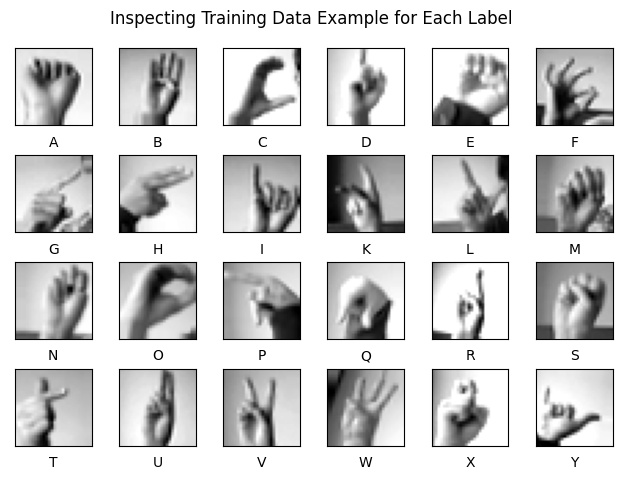

In [6]:
#visualization of dataset 
fig, ax = plt.subplots(4,6)
fig.suptitle('Inspecting Training Data Example for Each Label')
ax = ax.ravel()
pos = 0 

#loop through each label in dataset 
for label in range(0,26):
    #if label is not included in dataset 
    if label in [9,25]:
        continue
    #find first index of label
    idx = find_indices(y_train,label)[0][0]
    #display first found image 
    ax[pos].imshow(X_train[idx],cmap='gray')
    #set x label as dataset label
    ax[pos].set(xlabel=labels[label])
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

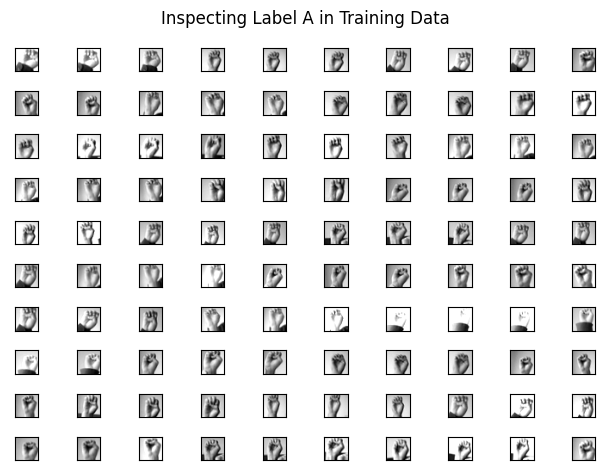

In [7]:
#visualization of dataset 
fig, ax = plt.subplots(10,10)
plt.suptitle('Inspecting Label A in Training Data')
ax = ax.ravel()
pos = 0 

label = 4

index = find_indices(y_train,label)[0]

#loop through each label in dataset 
for i, idx in enumerate(index):
    if i >= 100:
        break
    #display first found image 
    ax[pos].imshow(X_train[idx],cmap='gray')
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

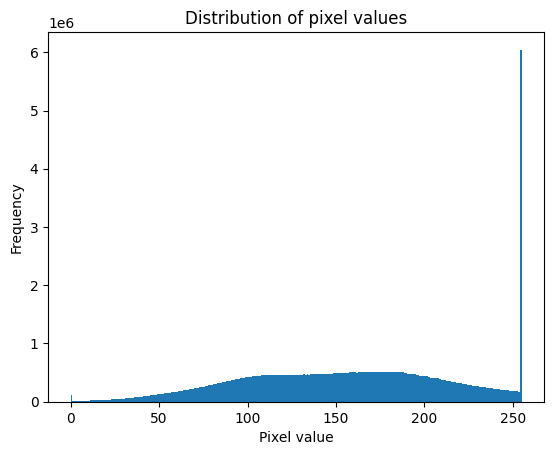

In [8]:
#plot the distribution of pixel values
pixel_values = X_train
plt.hist(pixel_values.flatten(), bins=256)
plt.title("Distribution of pixel values")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.show()

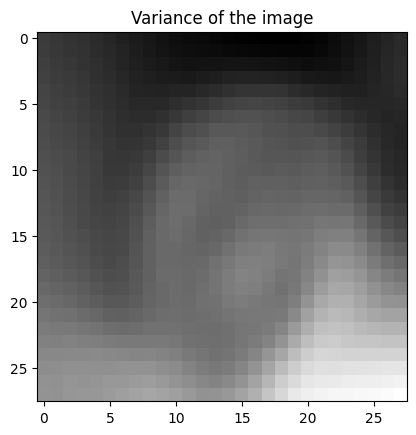

In [10]:
# plot the variance image
pixel_values = X_train
var_image = np.var(pixel_values, axis=0)
plt.imshow(var_image.reshape(28,28), cmap='gray')
plt.title("Variance of the image")
plt.show()

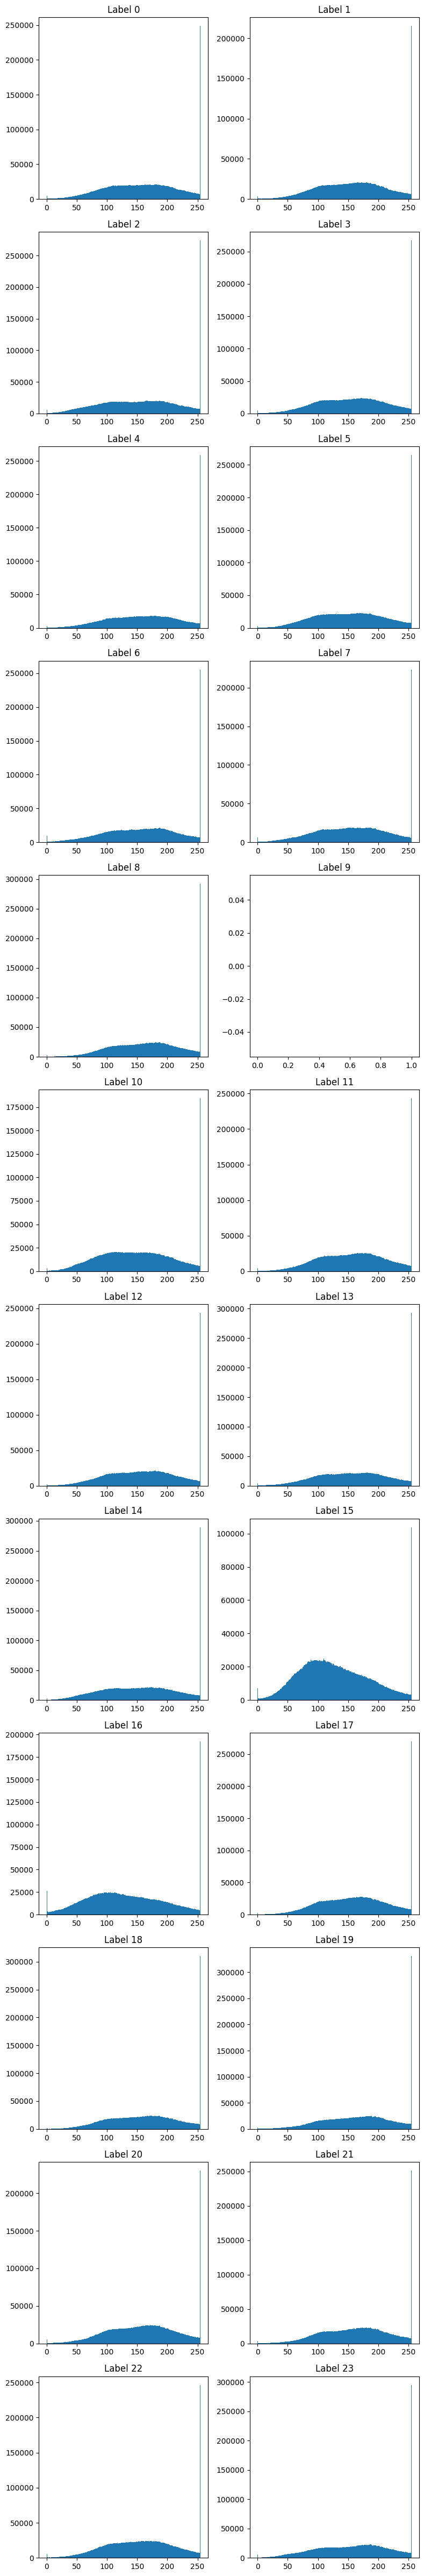

In [47]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(12, 2, figsize=(8, 48))
for i in range(len(np.unique(y_train))):
    label_data = X_train[y_train == i]
    pixel_values = label_data.flatten()
    axes[i//2][i%2].hist(pixel_values, bins=256)
    axes[i//2][i%2].set_title(f"Label {i}")
    
plt.tight_layout()
plt.show()



In [58]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(12, 6))

# # Grouping the train and test sets by label and counting the number of observations for each label
# train_counts = np.bincount(y_train)
# test_counts = np.bincount(y_test)

# # Plotting the bar chart for train and test set
# ax.bar(letters, train_counts, color='b', alpha=0.5, label='Train')
# ax.bar(letters, test_counts, color='r', alpha=0.5, label='Test')

# # Adding legend and labels
# ax.legend()
# ax.set_xlabel('Labels')
# ax.set_ylabel('Counts')
# ax.set_title('Distribution of Labels in Train and Test Sets')

# plt.show()








In [57]:
# #canny edge detection 
# def canny_edge_detection(image,sigma):
#     #check if numpy contents' data type is uint8, which is required for cv2.Canny 
#     if image.dtype != 'uint8':
#         #convert image dtype 
#         image = np.uint8(image)
#     #calculate lower and upper bounds for Canny function 
#     md = np.median(image)
#     lower = int(max(0,(1 - sigma) * md))
#     upper = int(min(255, (1 + sigma) * md))
#     #return edges detected 
#     return cv2.Canny(image, lower, upper)

# #function to convert dataframe of images to dataframe of edges 
# def convert_img_to_edges(data):
#     #list to store data
#     edges_data = []
#     #looping through dataframe rows 
#     for index, row in data.iterrows():
#         #reshaping image 
#         img = row.values.reshape(res)
#         #finding edges 
#         edges = list(canny_edge_detection(img,.25).flatten())
#         #appending to list 
#         edges_data.append(edges)
#     #return dataframe 
#     return pd.DataFrame(edges_data, columns=data.columns)

# #converting images to edges 
# X_train_edges = convert_img_to_edges(X_train)
# X_test_edges = convert_img_to_edges(X_test)